In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.svm import SVC,LinearSVC

from sklearn.metrics import accuracy_score,r2_score,classification_report

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


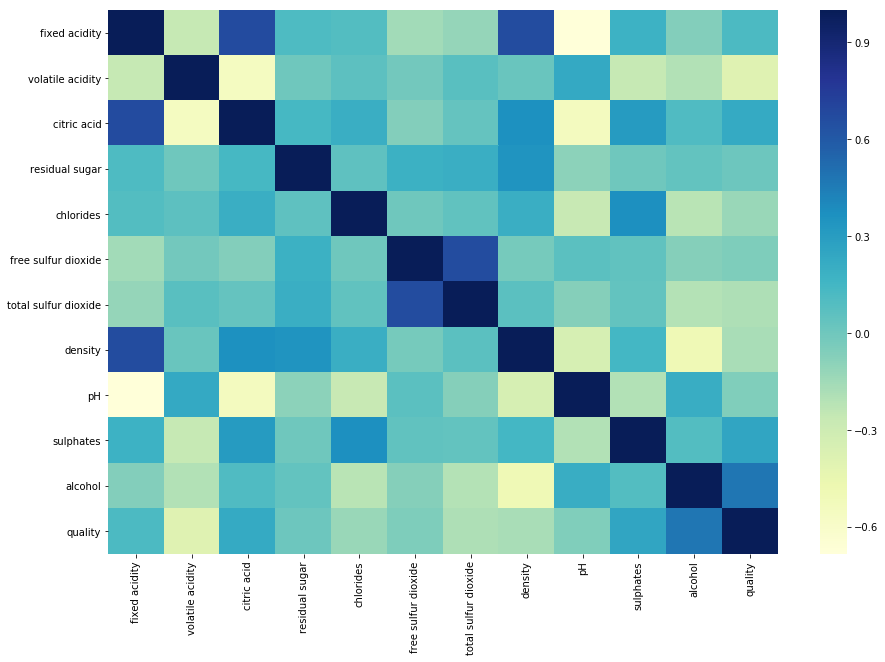

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu")

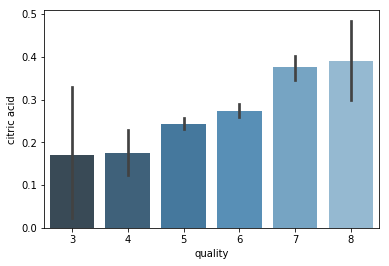

In [4]:
# plt.figure(figsize=(15,18))
sns.barplot(df['quality'],df['citric acid'],palette="Blues_d")

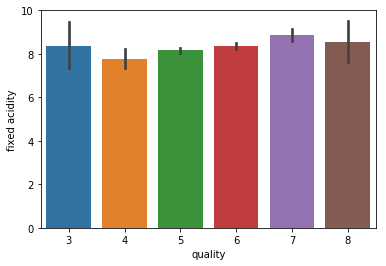

In [5]:
sns.barplot(df['quality'],df['fixed acidity'])

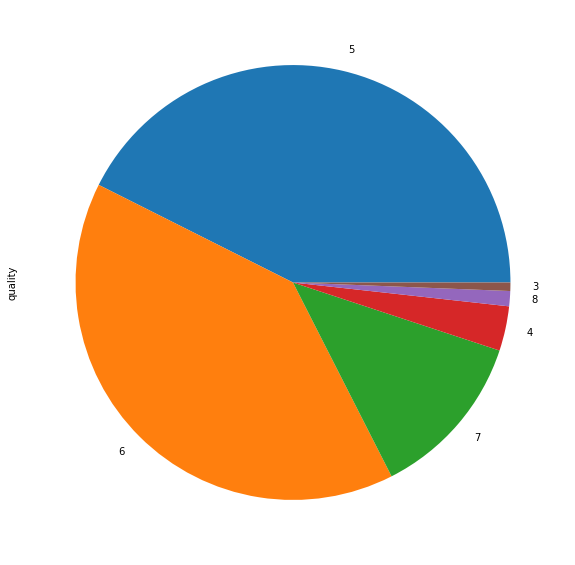

In [6]:
plt.figure(figsize=(15,10))
df['quality'].value_counts().plot.pie()

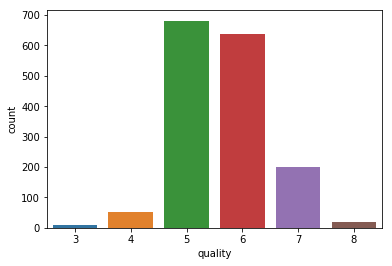

In [7]:
sns.countplot(df['quality'])

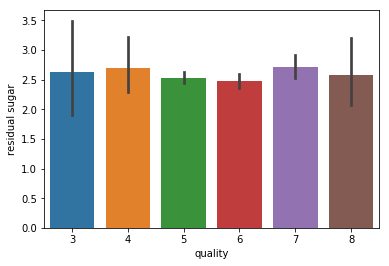

In [8]:
sns.barplot(df['quality'],df['residual sugar'])

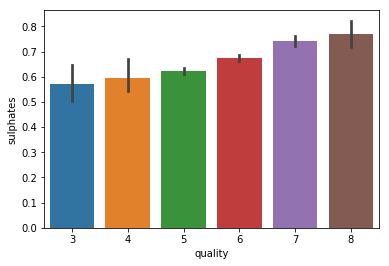

In [9]:
sns.barplot(df['quality'],df['sulphates'])

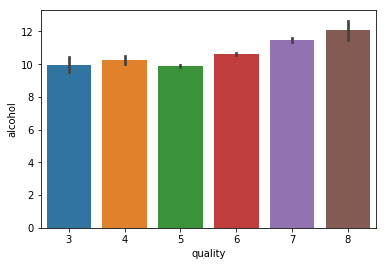

In [10]:
sns.barplot(df['quality'],df['alcohol'])

In [11]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])

In [12]:
X = df.drop('quality',axis=1)
y = df['quality']
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = []

In [13]:
linearreg = LogisticRegression()
linearreg.fit(X_train,y_train)
y_predict = linearreg.predict(X_test)
model.append(["Logistic",accuracy_score(y_predict,y_test)])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
linearreg = RandomForestClassifier(n_estimators=700,n_jobs=-1)
linearreg.fit(X_train,y_train)
y_predict = linearreg.predict(X_test)
model.append(["RandomForestClassifier",accuracy_score(y_predict,y_test)])

In [15]:
linearreg = GaussianNB()
linearreg.fit(X_train,y_train)
y_predict = linearreg.predict(X_test)
model.append(["GaussianNB",accuracy_score(y_predict,y_test)])

In [16]:
linearreg = SVC()
linearreg.fit(X_train,y_train)
y_predict = linearreg.predict(X_test)
model.append(["SVC",accuracy_score(y_predict,y_test)])

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
linearreg = ExtraTreesClassifier()
linearreg.fit(X_train,y_train)
y_predict = linearreg.predict(X_test)

model.append(["ExtraTreeClassifier",accuracy_score(y_predict,y_test)])

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
linearreg = DecisionTreeClassifier()
linearreg.fit(X_train,y_train)
y_predict = linearreg.predict(X_test)
model.append(["DecisionTreeClassifier",accuracy_score(y_predict,y_test)])

In [19]:
model = pd.DataFrame(model)
model.columns = ["Model Name","Score"]
model.sort_values(by="Score",ascending=False)

,Model Name,Score
4,ExtraTreeClassifier,0.899621
3,SVC,0.880682
1,RandomForestClassifier,0.878788
0,Logistic,0.869318
5,DecisionTreeClassifier,0.839015
2,GaussianNB,0.833333
